In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('Social_Network_Ads.csv')

In [7]:
df=df.iloc[:,2:]
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [9]:
df.sample(5)

,Age,EstimatedSalary,Purchased
334,57,60000,1
116,35,75000,0
355,60,34000,1
182,32,117000,1
72,20,23000,0


# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

# Standard Scaler

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
# transform train and test sets
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [17]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [21]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [23]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [25]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [27]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [29]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


<function matplotlib.pyplot.show(close=None, block=None)>

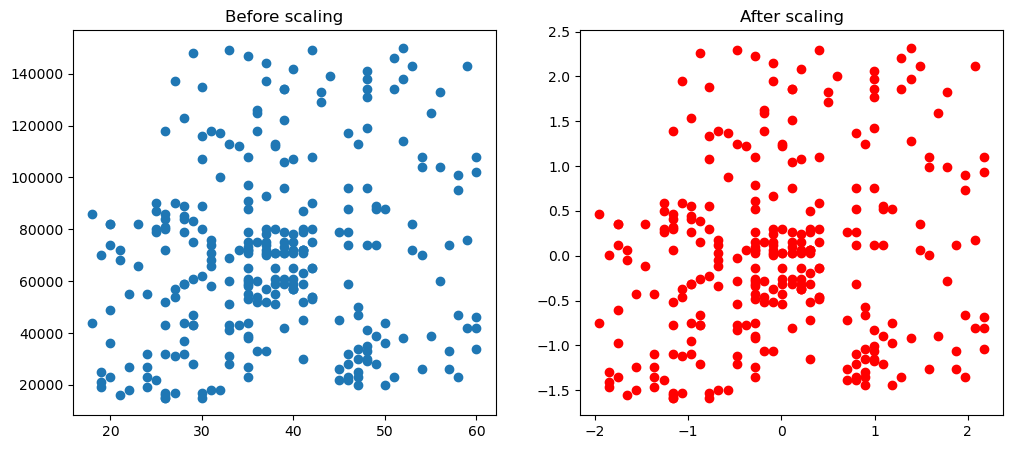

In [33]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After scaling")
plt.show

<Axes: title={'center': 'after scaling'}, xlabel='Age', ylabel='Density'>

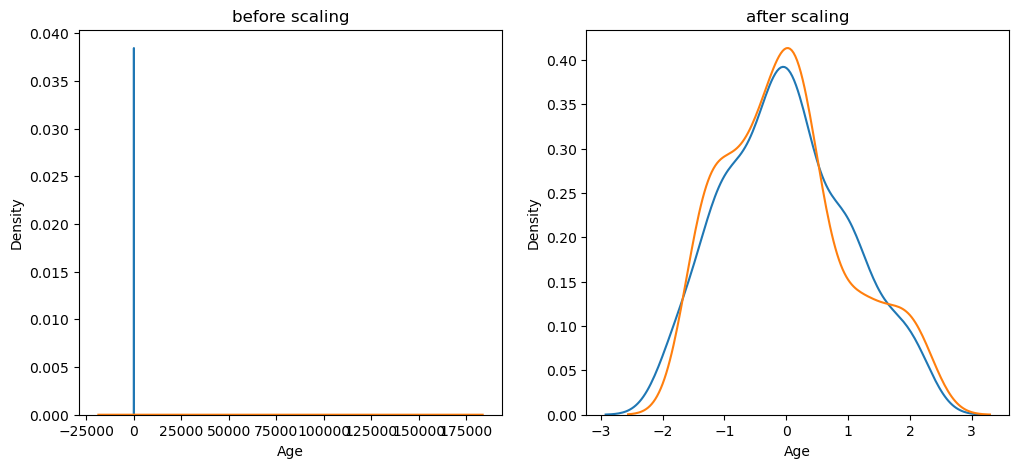

In [37]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before scaling
ax1.set_title("before scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
#after scaling
ax2.set_title("after scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

In [ ]:
#Comparison of distribution

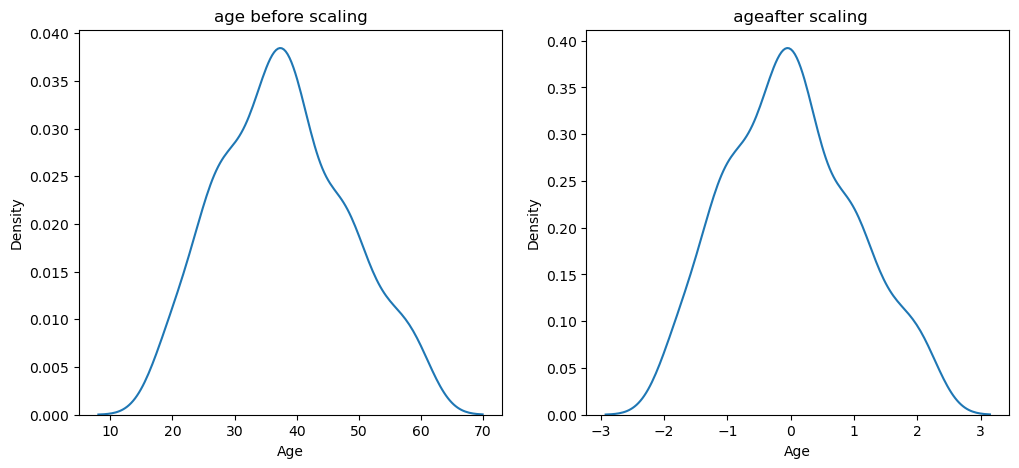

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("age before scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
ax2.set_title(" ageafter scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
plt.show()

# Why scaling is important

In [49]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [55]:
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [57]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [61]:
from sklearn.metrics import accuracy_score

In [63]:
print("actual",accuracy_score(Y_test,y_pred))
print("scaled",accuracy_score(Y_test,y_pred_scaled))
      

actual 0.875
scaled 0.8666666666666667


In [67]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [73]:
dt.fit(X_train,Y_train)
dt_scaled.fit(X_train_scaled,Y_train)

DecisionTreeClassifier()

In [75]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [79]:
print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [81]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of Outlier

In [92]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]})], ignore_index=True)


In [94]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


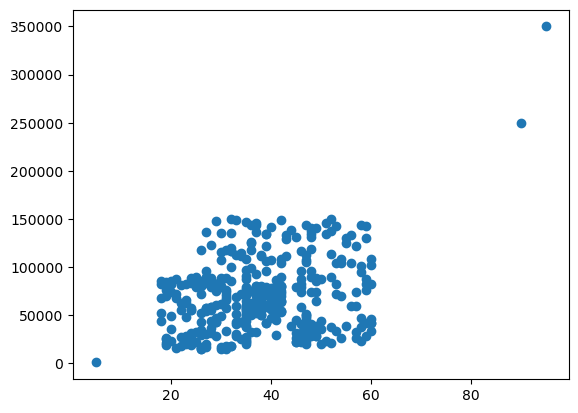

In [96]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [100]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#fit the scaler to the train set,
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [102]:
X_train_scaled

array([[-0.65247311, -0.99556055],
       [ 1.90304656,  2.09269661],
       [-0.10486175,  1.9227008 ],
       [-0.65247311,  0.56273435],
       [-0.01359319, -0.28724469],
       [ 1.53797232,  1.72437236],
       [-1.10881591, -1.53388061],
       [ 0.80782385, -0.5422384 ],
       [ 1.35543521, -0.99556055],
       [ 0.99036097,  2.03603134],
       [ 1.72050944,  1.49771128],
       [ 1.99431512,  0.93105859],
       [-1.29135303, -1.42055007],
       [ 0.71655529,  0.53440171],
       [-0.37866743,  1.29938284],
       [-0.92627879, -0.28724469],
       [ 0.99036097, -0.85389738],
       [-0.74374167,  0.279408  ],
       [ 0.80782385,  1.07272177],
       [ 0.62528673, -1.22222163],
       [-0.01359319, -0.5422384 ],
       [-0.28739887, -0.5422384 ],
       [-0.65247311,  0.13774483],
       [ 0.35148105,  0.30774064],
       [-0.19613031, -0.5422384 ],
       [-0.46993599,  2.26269242],
       [ 0.62528673,  0.279408  ],
       [ 0.26021249,  0.08107956],
       [ 0.35148105,

In [104]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

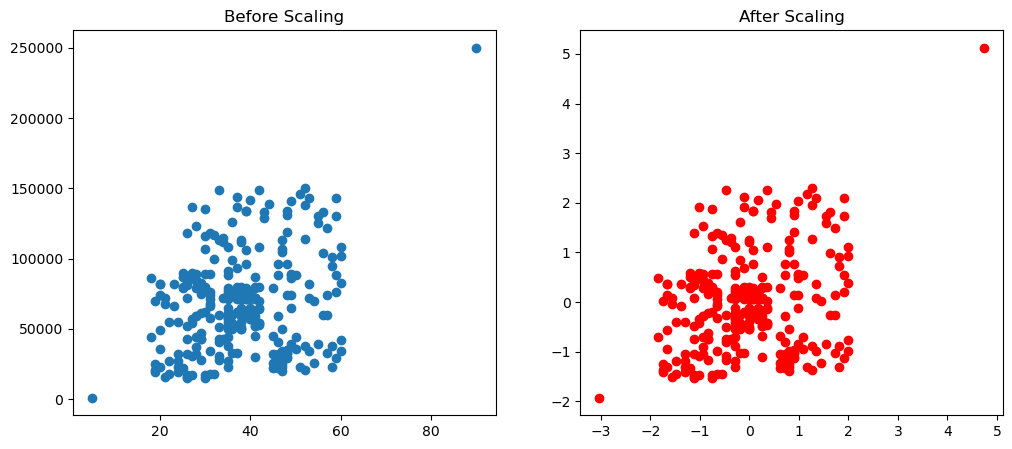

In [106]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

In [108]:
X_train_scaled.describe()

,Age,EstimatedSalary
count,2.820000e+02,2.820000e+02
mean,1.921237e-16,6.614095e-17
std,1.001778e+00,1.001778e+00
min,-3.025456e+00,-1.930537e+00
25%,-7.437417e-01,-7.405668e-01
50%,-1.048617e-01,-3.225098e-02
75%,7.165553e-01,4.989859e-01
max,4.732372e+00,5.124288e+00
